# Homework 1: Numpy, Scipy, Pandas

### Due Monday Feb 5, 2018 @ 2pm


## #0: Get set up with your environment to work on and submit homework

a. Create a new homework repository at github

<img src="data/screenshot_1.png">

Name your repo something sensible (e.g., python-ay250-homeworks). Given your Berkeley affiliation you should be able to get private repos if you'd like.

<img src="data/screenshot_2.png">


b. Clone this repo locally and make a directory for this week's homework:

```bash
cd /class/directories ## this will be different on your machine...whereever you want to keep your work.

# change <username> to your github username:
git clone https://github.com/<username>/python-ay250-homework.git
cd python-ay250-homework
mkdir hw_1
echo "hw_1 README" >> hw_1/README.md
git add hw_1/README.md
git commit hw_1/README.md -m "added hw_1 directory"
git push
```

c. Copy this notebook into your `hw_1` folder from a local version of the python-seminar repo

```bash
cd /class/directories
git clone https://github.com/profjsb/python-seminar.git 
cd python-seminar
git pull
cp -r Homeworks/hw_1/* /class/directories/python-ay250-homework/hw_1/
```

d. Get working! Be sure to check in your work as often as you'd like

```bash
cd /class/directories/python-ay250-homework
git add hw_1/<whatever>
git commit <whatever> -m "this is a check in"
```

e. To submit your work, go to this form to register your homework Repo URL (https://goo.gl/forms/4DTPxonYBAxmfxJG2). If you've made your repo private, you'll need to add us as collaborators to the repo.  Our Github handles are `@profjsb` and `@chelseaharris`.

## #1:  Super-resolution imaging 

Obtaining several snapshots of the same scene, from microscopes to telescopes, is useful for the postprocessing increase of signal to noise: by summing up imaging data we can effectively beat down the noise. Interestingly, if we image the same scene from different vistas we can also improve the clarity of the combined image. Being able to discern features in a scene from this combination effort is sometimes called super-resolution imaging.

Here, we'll combine about 4 seconds of a shaky video to reveal the statement on a license plate that is not discernable in any one frame.

<img src="data/im2-1.png">

A tarball of the data is at: https://drive.google.com/open?id=0B4vIeCR-xYNnbXFJTTVlVnpUZkk

```bash
tar -xvzf homework1_data.tgz  # do NOT check this files into git...
```

**Problem 1** Read in each image into a `numpy` array. Resize each frame to be 3 times larger in each axis (ie. 9 times larger images). Using `scipy.signal.fftconvolve` find the offsets of each frame with respect to the first frame. Report those offsets to 2 decimal places. 

   - Hint1: you'll need to figure out how to resize a numpy array
   - Hint2: you'll want to reverse the second image when doing the convolution: `scipy.signal.fftconvolve(im1, im2[::-1, ::-1])`
   - Hint3: you'll need to figure out how to identify the peak of the fft convolution to find the offsets between images

To run this code, the im2-*.png files should be place in ./data/ directory. The voice.wav and merged_data.csv for qs 2 and 3 are already there.

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.misc import imresize
from scipy.ndimage.interpolation import shift
import glob

#Read in all files in data directory
im_store = []
for im in glob.glob('./data/im2-*.png'): im_store.append(plt.imread(im))
  
#Resize each image dimension by a factor of 3 
im_exp = []
for im in im_store : 
    # Sum channels to cast to gray-scale
    im_gray = np.sum(im.astype('float'), axis=2) 
    im_exp_=imresize(im_gray,size=3.)
    # Find image center and take 512x512 slice to avoid white borders
    xc,yc=[np.int(dim/2) for dim in im_exp_.shape[0:2]]  
    im_zoom = im_exp_[xc-255:xc+256,yc-255:yc+256]
    # Remove mean to improve fftconvolve results
    im_exp.append(im_zoom-np.mean(im_zoom))

Populating the interactive namespace from numpy and matplotlib


/home/samuel_badman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [4]:
#For all other images, fftconvolve with the reference and find the peak to 
#determine the shift in image centers
offsets = []
im_ref = im_exp[0]

# Get reference point by autocorrelating reference image
convol_auto = sig.fftconvolve(im_ref[:,:],im_ref[::-1,::-1],mode='same')
x_c,y_c = np.where(convol_auto==np.max(convol_auto))

# Do convolution for each image and append offsets
for im in im_exp[1:] :
    convol = sig.fftconvolve(im_ref[:,:],im[::-1,::-1],mode='same')
    xp,yp = np.where(convol==np.max(convol))
    offsets.append((np.float(xp-x_c),np.float(yp-y_c)))

In [5]:
# Reporting the offsets in original pixel units
print('The pixel shifts are (in original pixel units to 2dp:) ')
count =1
for el in offsets :
    print('Image '+str(count)+': x-offset: '+str('{0:.2f}'.format(
           offsets[count-1][0]/3.))+' y-offset: '+str('{0:.2f}'.format(offsets[count-1][1]/3.)))
    count+=1

The pixel shifts are (in original pixel units to 2dp:) 
Image 1: x-offset: -32.33 y-offset: 40.67
Image 2: x-offset: -18.67 y-offset: 15.33
Image 3: x-offset: 6.33 y-offset: 59.67
Image 4: x-offset: -53.67 y-offset: 8.00
Image 5: x-offset: 14.67 y-offset: 56.33
Image 6: x-offset: 0.33 y-offset: 46.67
Image 7: x-offset: -37.67 y-offset: -20.67
Image 8: x-offset: 21.00 y-offset: 28.67
Image 9: x-offset: -21.67 y-offset: 2.33
Image 10: x-offset: -18.67 y-offset: -19.67
Image 11: x-offset: -37.67 y-offset: 34.67
Image 12: x-offset: -32.33 y-offset: -0.33
Image 13: x-offset: -35.33 y-offset: 46.67
Image 14: x-offset: -19.33 y-offset: 34.33
Image 15: x-offset: -18.00 y-offset: 10.33
Image 16: x-offset: 0.00 y-offset: 34.00
Image 17: x-offset: -2.33 y-offset: 47.67
Image 18: x-offset: -28.00 y-offset: 5.00
Image 19: x-offset: -20.33 y-offset: 54.00
Image 20: x-offset: 8.00 y-offset: 45.00
Image 21: x-offset: -21.67 y-offset: -5.33
Image 22: x-offset: -1.67 y-offset: 2.67
Image 23: x-offset: -

**Problem 2** Shift each image to register the frames to the original (expanded in size) frame. You should, in general, be shifting by subpixel offsets. You might want to look at `scipy.ndimage.interpolation.shift`

In [6]:
im_shift=[im_exp[0]]
count2=0
#For each image that is not the reference image, shift by the corresponding
# offsets found above
for im in im_exp[1:] :
    im_shift.append(shift(im,offsets[count2]))
    count2+=1
im_shift=np.array(im_shift)

**Problem 3** Combine all the registered images to form a super-resolution image. What does the license plate read?

The license plate reads: ' IM A CAR ' !


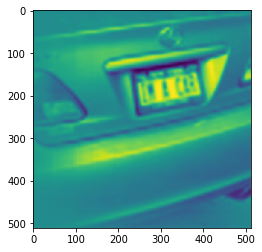

In [7]:
plt.imshow(np.mean(im_shift,axis=0))
print('The license plate reads: \' IM A CAR \' !')

# #2: An elementary introduction to spectral audio compression

In this problem, we'll explore the very basics of audio compression in the spectral domain using numpy and scipy. We'll do a bit of visualization with matplotlib, but since that is covered later in the course, we'll provide those functions for you.

Audio compression is a large and complex topic, and the design of a format for compressed audio such as the popular [MP3](http://en.wikipedia.org/wiki/MP3) is too complex to cover in detail here. However, we will introduce the basic tools that most such compression formats use, namely:

1. Converting the input signal to the frequency domain by taking a Fast Fourier Transform (FFT).

2. Dropping information in the frequency domain, resulting in a smaller amount of data.

3. Reconstructing back the signal in the time domain from this smaller representation of the signal.

Steps 1 and 2 above are the 'encoding' part of signal compression, and step 3 is the 'decoding' part. For this reason, the tools that perform these steps are typically referred to as signal 'codecs', short for encoders/decoders.

Note that here we say 'signal': while MP3 is an audio format, the same ideas apply to the compression of digital images with formats such as JPEG and video.  Virtually all multimedia technologies we use today, from audio players to cell phones, digital cameras and YouTubeVideo, are based on sophisticated extensions and applications of these simple ideas.

Let's first load the plotting tools and importing some tools we'll need later:

In [11]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# we'll need some path manipulations later on
import os, collections

Populating the interactive namespace from numpy and matplotlib


We define a simple utility function to listen to audio files right in the browser:

In [12]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

We also define a convenience wrapper around `plt.specgram`, [matplotlib's spectrogram function](http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram), with a colorbar and control over the color limits displayed. This will make it easier to compare across different signals with the same colors for all inputs.

In [13]:
def specgram_cbar(x,sample_rate, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x,Fs=sample_rate)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

**Problem 1**: Use the `Audio` function above to listen to the signal we will be experimenting with, a simple voice recording stored in the file `Homeworks/hw1/data/voice.wav`.

Note: if your browser doesn't support audio, you may try a different browser.   We've tested current versions of Chrome and Firefox, and it works OK with both.

In [14]:
Audio('./data/voice.wav')

**Problem 2**: Write a function to compress a 1-d signal by dropping a fraction of its spectrum. 

You can drop the smallest components by setting their values to zero.

*Hints*: 

- look at the `np.fft` module, keeping in mind that your input signal is real.
- look at the `argsort` method of numpy arrays.

In [15]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
    if fraction < 0 or fraction > 1  : 
        raise ValueError('Fraction must be >0, < 1')
    # Get Frequency Spectrum by computing the real fft of the signal x
    spec = np.fft.rfft(x)
    # Rank the frequency channels by their power
    channels_sorted = np.argsort(np.abs(spec))
    # Set the weakest <fraction> of frequencies to 0
    spec[channels_sorted[:int(fraction*spec.size)]] = 0
    #Inverse FFT the compressed spectrum to obtain the compressed 
    # time series
    x_approx = np.fft.irfft(spec)  
    return x_approx

As a quick visual check (not that this is *not* a formal test of correctness), experiment with a simple random signal by changing the compression ratio and plotting both the signal and the compressed version:

In [16]:
x = np.random.rand(128)

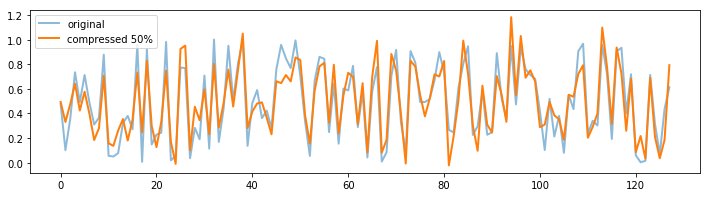

In [17]:
fraction = 0.5 # play changing this in the 0-1 range

xa = compress_signal(x, fraction)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(fraction))
plt.legend();

**Problem 3**: Write a function that will compress an audio file by a dropping a fraction of its spectrum, writing the output to a new file.

If the input file is named `a.wav` and the compression fraction is 0.9, the output file should be named `a_comp_0.9.wav`.

*Hints:* 

- look at the `scipy.io` module for routines dealing with files in `wav` format.

- you may need to use the `astype` method of numpy arrays to get the correct data type for `wav` files.

In [22]:
def compress_wav(fname, fraction):
    """Compress an audio signal stored in an input wav file.
    
    The compressed signal is returned as a numpy array and automatically written 
    to disk to a new wav file.
    
    Parameters
    ==========
    fname : string
      Name of the input wav file
      
    fraction : float
      Fraction of input data to keep.
      
    Returns
    =======
    rate : int
      Bit rate of the input signal.

    x : array
      Raw data of the original input signal.
      
    x_approx : array
      Raw data of the compressed signal.
      
    new_fname : string
      Auto-generated filename of the compressed signal.
    """
    #Read in input file using scipy.io.wavfile
    wav_in = wavfile.read(fname)
    
    #Extract input bitrate from sample frequency
    sample_rate = wav_in[0] #Hz
    dt = wav_in[1].dtype # data type
    if dt.type is np.int8 :
        bit_depth = 8
    elif dt.type is np.int16 :
        bit_depth = 16
    elif dt.type is np.int32 :
        bit_depth = 32 
    bitrate = bit_depth*sample_rate #bits per second
    
    #Extract signal (x) from wav tuple
    x = wav_in[1]
    
    #Run compress signal on this signal
    x_approx = compress_signal(x,fraction)
    
    # Convert x_comp type to ints to match input data type
    x_approx_int = x_approx.astype(int16)
    
    # Write compressed wavfile to new file :
    # fname.wav ->  fname_comp_fraction.wav
    new_fname = fname[:fname.find('.wav')]+'_comp_'+str(fraction)+'.wav'
    wavfile.write(new_fname, sample_rate, x_approx_int)
    
    return bitrate, x, x_approx, new_fname

**Problem 4**: Study the effect of compressing the input file at different ratios: 0.1, 0.5, 0.75, 0.9, 0.95, 0.99.

Using the `OrderedDict` class from the [Python collections module](http://docs.python.org/2/library/collections.html#collections.OrderedDict), store the uncompressed signal as well as the compressed array and filename for each compression ratio.

You will create an `OrderedDict` called `voices`, with:

- keys: compression ratios
- values: pairs of (x, filename) where x is the compressed audio and filename is the name of the compressed file.

In [23]:
#Define compression ratios
keys = [0.1,0.5,0.75,0.9,0.95,0.99]

#input filename
fname = 'voice.wav'

#Create ordereddict 'Voices'
voices = collections.OrderedDict()

# counter for storing uncompressed file
init=0

#for each compression ratio, compress the voice.wav file and store the
# results in an ordered_dict. The first dict element has key 0 and is
# the uncompressed initial audio and filename.
for fraction in keys :
    rate,x,x_approx,new_fname = compress_wav('./data/'+fname,fraction)
    if init == 0 :
        voices[0] = (x,'./data/'+fname)
        init = 1
    voices[fraction] = (x_approx, new_fname)    

**Problem 5**: Loop over the `voices` dict, and for each one generate an audio player as well as a spectrogram.  Observe how the spectrogram changes, and listen to each file.  At what ratio do you stop understanding the recording?

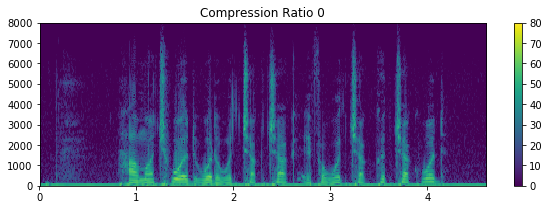

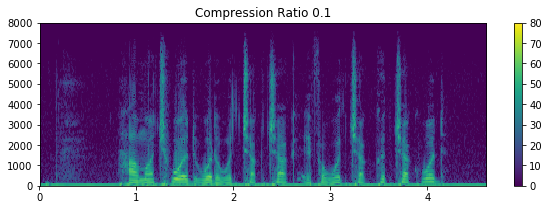

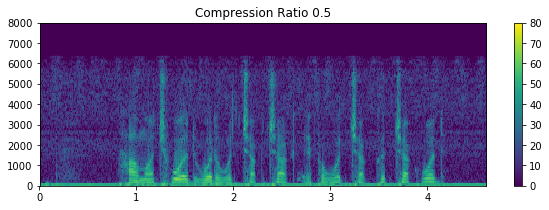

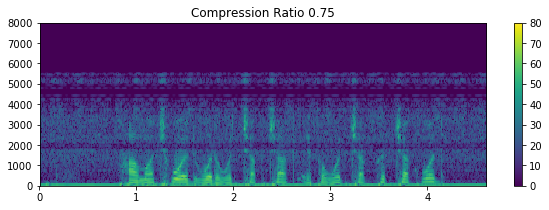

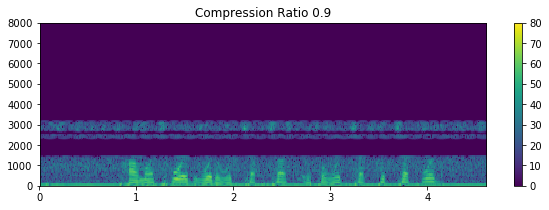

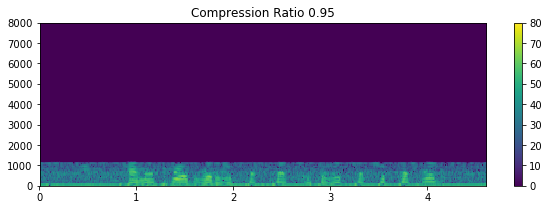

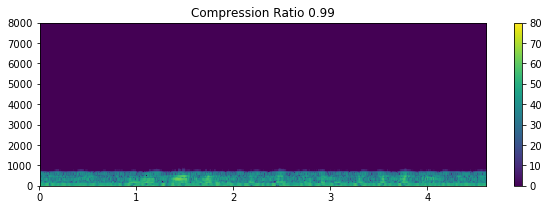

In [24]:
# Loop through voices dictionary, 
for key, values in voices.items() :
    signal,fname = values[0],values[1]
    Audio(fname)
    specgram_cbar(signal,16000, title = 'Compression Ratio '+str(key))

The audio file becomes difficult to hear words from at a compression ratio of approximately 0.95.

# #3: Armchair Astronomer

Often times, people act as good sensors of the physical universe. We can use Google Trends data to help us determine some fundamental parameters of the Solar System.

**Problem 1**: Using just the CSV file we created in the pandas lecture (`merged_data.csv`) and some frequency analysis tools in `scipy` to determine:

   - the number of days in a year
   - the period of the moon's orbit around the Earth
   
Hint: `from scipy.signal.spectral import lombscargle` (you'll want to normalize your signal so it has a mean of zero.)

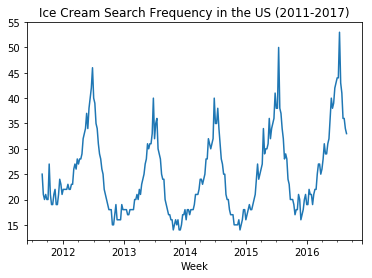

In [25]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
from scipy.fftpack import fftfreq

#Read in CSV file
merged_data = pd.read_csv('./data/merged_data.csv',index_col=0,parse_dates=[0])

# Data is weekly google trends data for search terms in the US:
# "Ice cream', 'Volleyball', 'tennis' and 'full moon'

#Take the Ice Cream data, we try to find the length of the year assuming
# search trends spike annually in the US summer months.
merged_data['ice cream'].plot() 
plt.title('Ice Cream Search Frequency in the US (2011-2017)')

In [26]:
# Convert weeks into analogue time, retrieve as an array of time values
# in seconds 
time  = merged_data.index.values.astype('int64')*1e-9
time -= time[0]

#Get ice cream search rate as an array, normalize to mean of 0
ic = merged_data['ice cream'].values.astype(float)
ic -= np.average(ic)

#Use scipy.signal periodogram to obtain periodogram of ice cream search peaks
freqs,pgram = periodogram(ic,fs=1/(7*24*3600))

#Take peak of periodogram to give frequency corresponding to a year
# Take reciprocal and express in days
freq_max = freqs[np.where(pgram==np.max(pgram))]
year_length = (1./24./3600.)*(1./freq_max)[0]
print('The length of a year according to google searches for \'Ice Cream\'')
print('between 2011-2017 is: '+str(year_length)+' days')

The length of a year according to google searches for 'Ice Cream'
between 2011-2017 is: 365.4 days


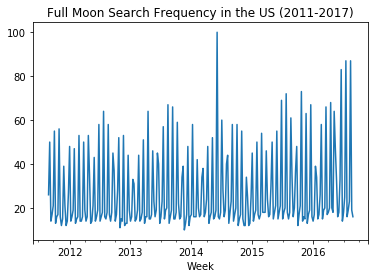

In [27]:
# Take the full moon data to estimate the periodicity of the moon. 
# Searches for the full moon in a given location will peak once per
# lunar orbit:

merged_data['full moon'].plot() 
plt.title('Full Moon Search Frequency in the US (2011-2017)')

In [28]:
# The time axis is the same, but the moon data should be turned into an 
# array and normalized:

#Get ice cream search rate as an array, normalize to mean of 0
fm = merged_data['full moon'].values.astype(float)
fm -= np.average(fm)

#Use scipy.signal periodogram to obtain periodogram of full moon search peaks
freqs,pgram_fm = periodogram(fm,fs=1/(7*24*3600))

#Take peak of periodogram to give frequency corresponding to the moons 
#orbital period. Take reciprocal and express in days
freq_max = freqs[np.where(pgram_fm==np.max(pgram_fm))]
year_length = (1./24./3600.)*(1./freq_max)[0]
print('The orbital period of the moon according to google searches for ')
print('\'full moon\' between 2011-2017 is: '+str(year_length)+' days')

The orbital period of the moon according to google searches for 
'full moon' between 2011-2017 is: 29.4677419355 days


# #4: Reproducing some insights about the Election

Nate ("not a genius, just a Bayesian") Silver writes often about polls and their utility of predicting elections. One of the things he emphasized during the 2016 campaign is that even "large" polls of people with a consistent lead for one candidate will show wild swings in any given window in time.

**Problem 1**: Using Pandas and `numpy`, try to reproduce this plot from a Nate Silver Tweet qualitatively using the same assumptions.

<img src="https://www.evernote.com/l/AUU-KkH3Z-lBdKokzCzVIUe53YZLQ9e_AuMB/image.png">

https://twitter.com/NateSilver538/status/769565612955824128

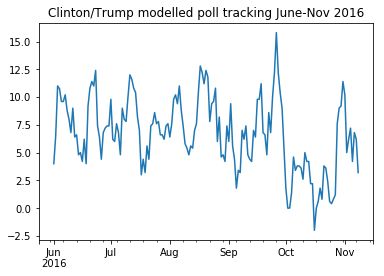

In [29]:
import numpy as np
import pandas as pd

#Assume the 6 point lead : 53% probability a respondent chooses Clinton (1)
# 47% probability they choose Trump (0)

#On a given day, assume 200 people are polled with the above underlying 
#probability. Function below allows points lead for clinton to be adjusted.
# Output is number of votes for Clinton out of das sample
def day_poll(lead,samples) :
    poll_arr = np.random.choice([0,1],size=samples,p=[(50-lead/2)/100,
                                                      (50+lead/2)/100])
    return np.sum(poll_arr)

#Use Pandas to generate the dates sampled dates: 
#every day from Jun 1 to Nov 8 (election day)
poll_dates = pd.date_range("2016-06-01","2016-11-08")

#Generate modelled polling data by running day poll each day.
#5 day rolling sample means the projected lead for a given day is based
# on the sum of the days polling + 4 days polling prior. Early info is
#forgotten

#First store poll results per day in list
day_poll_list = []
lead = 6
samples = 200
for days in poll_dates : day_poll_list.append(day_poll(lead,samples))
poll_arr = np.array(day_poll_list)
 
#Now make 5 day sum of poll numbers and convert to units of percentage point
count = 1
roll_number = 5
points = []
for count in range(1,poll_arr.size+1) :
    if count <= roll_number :     
        points.append(200*np.sum(poll_arr[:count])/(count*samples)-100)
    else : 
        points.append(200*np.sum(poll_arr[count-roll_number:count])/1000-100)

# Combine dates and points into pandas DataFrame
poll_results = pd.DataFrame(data=points,index=poll_dates )

#Plot results 
poll_results.plot(title='Clinton/Trump modelled poll tracking June-Nov 2016'
                  ,legend=False)

Conclusion, simple statistical modelling shows even an assumed true 6 point lead can lead to poll results which favour the other candidate.

**Problem 2**: Clearly, even with a 6% point lead, there's a chance that this sort of poll would show the other person in the lead. How much would ahead (in percent) would a candidate need to be to have a tracking poll never show the other candidate to be ahead over the course of a year (in your simulation)?

In [30]:
#To test the lead needed to never show the other candidate leading over a year, we should repeat the above analysis
# with different points leads

#Try point leads from 6% to 25%
points_arr = np.array(range(24,48))/4
#Make a new date object that goes over a year:
poll_year = pd.date_range("2016-01-01","2016-12-31")

#Write a function that returns how many days in the year, the trailing candidate is polled as the winner
def poll_track_sim(points,samples):
    points_track=[]
    day_poll_list=[]
    roll_number=5
    for days in poll_year : day_poll_list.append(day_poll(points,samples))
    poll_arr = np.array(day_poll_list)
    for count in range(1,poll_arr.size+1) :
        if count <= roll_number :     
            points_track.append(200*np.sum(poll_arr[:count])/(count*samples)-100)
        else : 
            points_track.append(200*np.sum(poll_arr[count-roll_number:count])/1000-100)
    return len(np.where(np.array(points_track) < 0)[0])
    

In [31]:
i=0
samples=200
for points in points_arr : 
    n_days = 0
    for i in range(50) : 
        n_days += poll_track_sim(points,samples)
    n_days = n_days/50
    print('With a lead of '+str(points)+' leading candidate trails on '+str(n_days)+' days in a year (averaged over 50 years)')

With a lead of 6.0 leading candidate trails on 9.96 days in a year (averaged over 50 years)
With a lead of 6.25 leading candidate trails on 8.26 days in a year (averaged over 50 years)
With a lead of 6.5 leading candidate trails on 6.9 days in a year (averaged over 50 years)
With a lead of 6.75 leading candidate trails on 5.66 days in a year (averaged over 50 years)
With a lead of 7.0 leading candidate trails on 4.6 days in a year (averaged over 50 years)
With a lead of 7.25 leading candidate trails on 4.08 days in a year (averaged over 50 years)
With a lead of 7.5 leading candidate trails on 3.0 days in a year (averaged over 50 years)
With a lead of 7.75 leading candidate trails on 2.28 days in a year (averaged over 50 years)
With a lead of 8.0 leading candidate trails on 1.72 days in a year (averaged over 50 years)
With a lead of 8.25 leading candidate trails on 1.52 days in a year (averaged over 50 years)
With a lead of 8.5 leading candidate trails on 1.54 days in a year (averaged o

Conclusion: To average less than one day a year of polls showing the trailing candidate in the lead, the true poll lead should be greater than 9% according to this model.

**Problem 3**: With a 3 and 6% lead, how many people would need to be polled in 1 day to have the rolling 5-day poll result always show the leader ahead (over a year)?

In [32]:
# To test this, we now use the same function defined in In[103],  but now with sample as the variable rather than points

samples_arr = range(200,600,25)

#3 percentage points lead
points=3
print('For a 3% points lead : ')
for samples in samples_arr : 
    n_days = 0
    for i in range(50) : 
        n_days += poll_track_sim(points,samples)
    n_days = n_days/50
    print('With '+str(samples)+' people sampled every day, leading candidate trails on '+str(n_days)+' days in a year (averaged over 50 years)')

#6 percentage points lead
samples_arr = range(200,215,1)
points = 6
print('For a 6% points lead : ')
for samples in samples_arr : 
    n_days = 0
    for i in range(50) : 
        n_days += poll_track_sim(points,samples)
    n_days = n_days/50
    print('For '+str(samples)+' people sampled daily, leading candidate trails on '+str(n_days)+' days in a year (averaged over 50 years)')

For a 3% points lead : 
With 200 people sampled every day, leading candidate trails on 61.72 days in a year (averaged over 50 years)
With 225 people sampled every day, leading candidate trails on 1.16 days in a year (averaged over 50 years)
With 250 people sampled every day, leading candidate trails on 1.04 days in a year (averaged over 50 years)
With 275 people sampled every day, leading candidate trails on 1.04 days in a year (averaged over 50 years)
With 300 people sampled every day, leading candidate trails on 0.98 days in a year (averaged over 50 years)
With 325 people sampled every day, leading candidate trails on 0.92 days in a year (averaged over 50 years)
With 350 people sampled every day, leading candidate trails on 0.86 days in a year (averaged over 50 years)
With 375 people sampled every day, leading candidate trails on 0.9 days in a year (averaged over 50 years)
With 400 people sampled every day, leading candidate trails on 0.74 days in a year (averaged over 50 years)
With

 Conclusions: With a 3% lead, at least 300 people should be sampled every day for the leading candidate to be polled as trailing on \<1 day a year. For a 6% lead, 207 people are sufficient (drops off very rapidly).